<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/Ufairah_Damara_Bashir_H071201091_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Preprocessing Structured Data

pertama kita mengimport library yang kita perlukan untuk mengolah data-data.

In [ ]:
#import library
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Dataset: Parking Birmingham Data Set

Context
While exploring the Aerial Bombing Operations of World War Two dataset (https://www.kaggle.com/usaf/world-war-ii), and recalling that the D-Day landings were nearly postponed due to poor weather, I sought out weather reports from the period to compare with missions in the bombing operations dataset.

Content
The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

Acknowledgements
The data are taken from the United States National Oceanic and Atmospheric Administration (https://www.kaggle.com/noaa) National Centres for Environmental Information website: https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data

Inspiration
This dataset is mostly to assist with the analysis of the Aerial Bombing Operations dataset, also hosted on Kaggle.

## 3. Dataset Exploration

### 1. unzip
unzip digunakan untuk mengekstrak file zip yang saya simpan di gdrive saya. sebelumnya, saya telah menghubungkan gdrive saya dengan gcolab

In [ ]:
!unzip -q /content/drive/MyDrive/WORK/PERKULIAHAN/semester3/5PROGRAM/DATASET/archive2.zip

### 2. read
read_csv digunakan untuk membaca data csv. berhubung data yang di zip adalah file csv makanya saya menggunakan read_csv

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/WORK/PERKULIAHAN/semester3/5PROGRAM/DATASET/archive2.zip")
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,27,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,12,28,0.39,NaN,NaN,85.0,65.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,12,29,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,30,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. colums
columns untuk melihat atribut apa saja yang dimiliki file ini

In [ ]:
data.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

### 4. head
head(n) digunakan untuk melihat n baris dari dataset yang kita inginkan

In [ ]:
data.head(20)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,6,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,7,7,T,NaN,NaN,83.0,73.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,8,0.14,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,7,9,T,NaN,NaN,81.0,73.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,7,10,0.14,NaN,NaN,78.0,71.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. value_counts
.value_counts() untuk melihat dengan detail data di tiap atribut.

In [ ]:
data.value_counts()

Series([], dtype: int64)

### 6. column_name[n1:n2]

untuk mengetahui atribut apa saja dari ke-n1 sampai ke-n2

In [ ]:
column_name = data.columns
column_name_class = column_name[2:3]
column_name_class

Index(['Precip'], dtype='object')

### 7. (data[i].value_counts())

mengetahui banyaknya tiap data dalam atribut

In [ ]:
for i in column_name_class:
  print(data[i].value_counts())

0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
184.404        1
211.328        1
152.4          1
126.492        1
83.312         1
Name: Precip, Length: 540, dtype: int64


### 8. grafik
melihat grafik hubungan antar atribut dengan banyaknya isi atribut dari data set

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


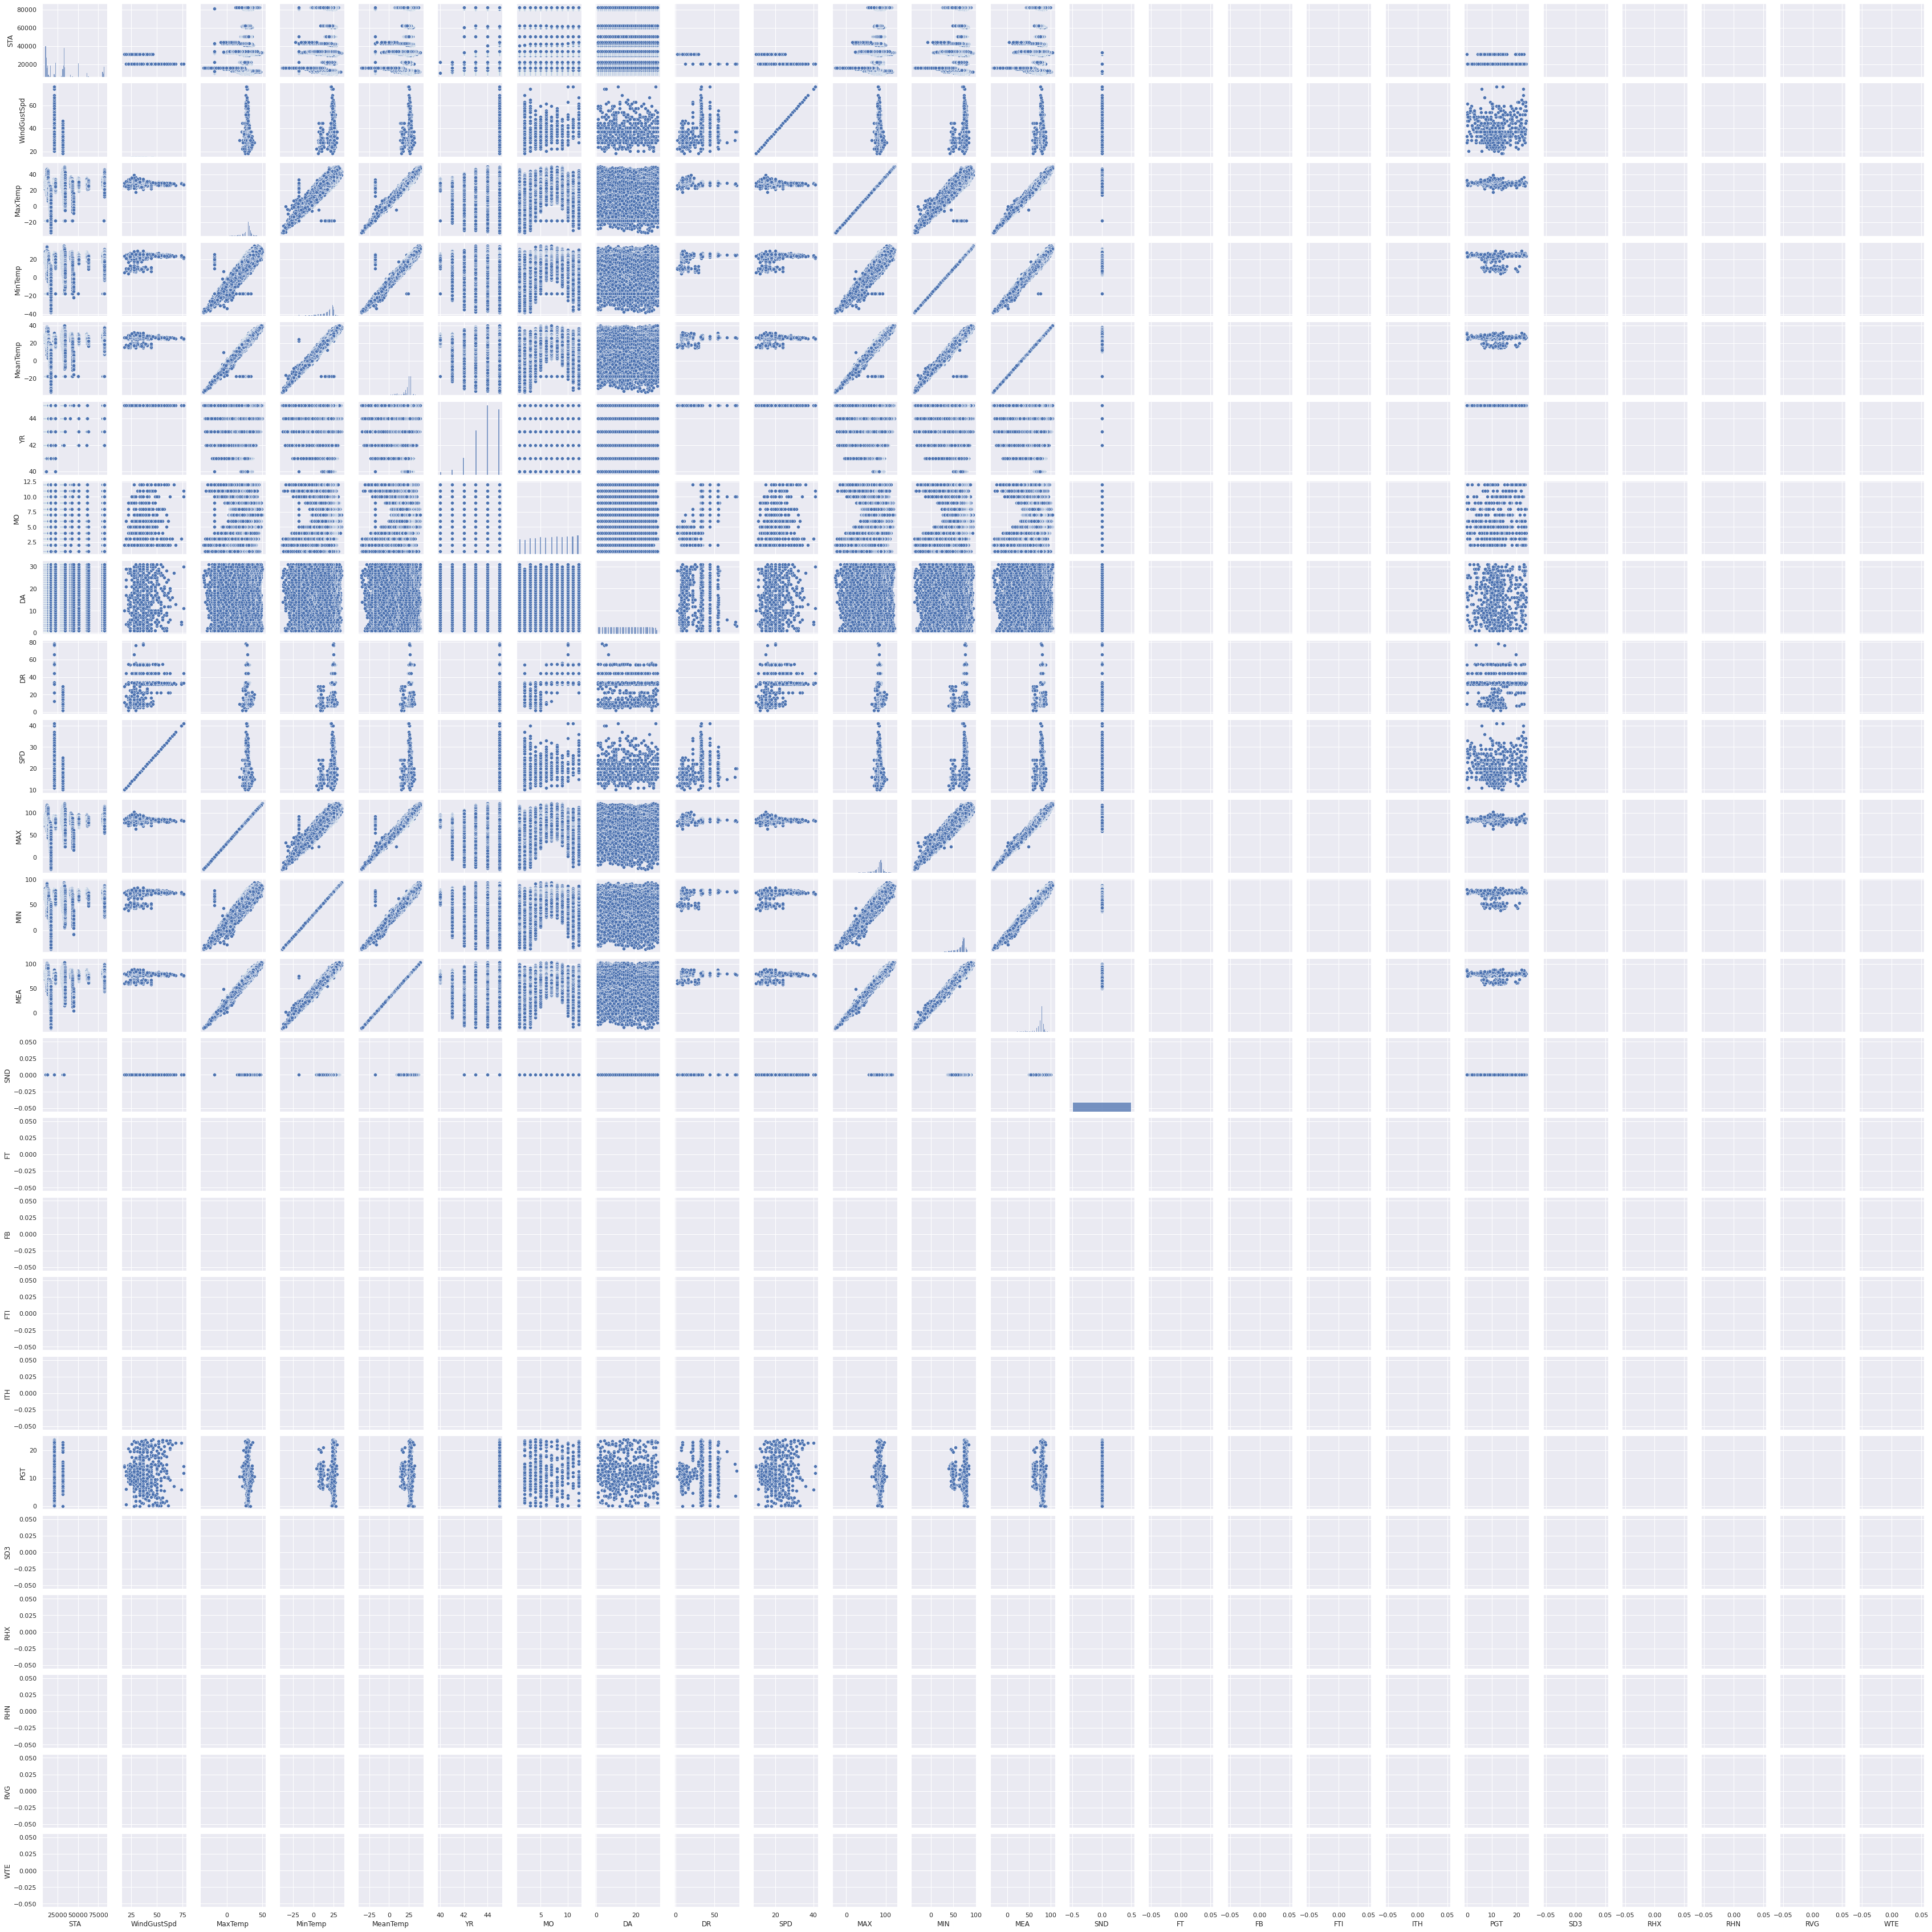

In [ ]:
sns.set()
cols = column_name
sns.pairplot(data[cols], size=2)
plt.show();

### 9. grafik atribut

melihat grafik data atribut

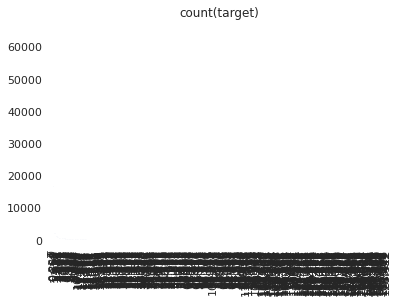

In [ ]:
for i in column_name_class:
  data[i].value_counts().plot(kind='bar',title='count(target)')
  plt.show()

In [ ]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


### tipe data

In [ ]:
data.dtypes

STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

### drop atribut

In [ ]:
data = data.drop (['PGT'], axis=1)
data = data.drop (['SD3'], axis=1)
data = data.drop (['RHX'], axis=1)
data = data.drop (['RHN'], axis=1)
data = data.drop (['RVG'], axis=1)
data = data.drop (['FTI'], axis=1)
data = data.drop (['FB'], axis=1)
data = data.drop (['FT'], axis=1)
data = data.drop (['SND'], axis=1)
data = data.drop (['PRCP'], axis=1)
data = data.drop (['WTE'], axis=1)
data = data.drop (['WindGustSpd'], axis=1)
data = data.drop (['TSHDSBRSGF'], axis=1)
data = data.drop (['SNF'], axis=1)
data = data.drop (['Snowfall'], axis=1)
data = data.drop (['DR'], axis=1)
data = data.drop (['ITH'], axis=1)
data = data.drop (['PoorWeather'], axis=1)
data = data.drop (['SPD'], axis=1)

In [ ]:
data = data.drop (['Precip'], axis=1)

In [ ]:
data = data.drop (['Date'], axis=1)

### data baru

In [ ]:
data

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,10001,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0
1,10001,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0
2,10001,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0
3,10001,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0
4,10001,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0
...,...,...,...,...,...,...,...,...,...,...
119035,82506,28.333333,18.333333,23.333333,45,12,27,83.0,65.0,74.0
119036,82506,29.444444,18.333333,23.888889,45,12,28,85.0,65.0,75.0
119037,82506,28.333333,18.333333,23.333333,45,12,29,83.0,65.0,74.0
119038,82506,28.333333,18.333333,23.333333,45,12,30,83.0,65.0,74.0


## 4. Handle Missing Value

### 1. missing data

banyaknya data yang hilang

In [ ]:
data.isnull().sum()

STA           0
Date          0
Precip        0
MaxTemp       0
MinTemp       0
MeanTemp      0
YR            0
MO            0
DA            0
MAX         474
MIN         468
MEA         498
dtype: int64

### 2. jumlah baris dan kolom

In [ ]:
data.shape

(119040, 12)

In [ ]:
data_rem_index = data.dropna(axis = 0, how = 'all', inplace = True)
print(data_rem_index)

None


### 3. fill the missing value

In [ ]:
data = data.fillna(data.mean())
data.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
YR          0
MO          0
DA          0
MAX         0
MIN         0
MEA         0
dtype: int64

In [ ]:
data["MO"].value_counts()

12    11043
8     10547
10    10501
11    10408
7     10235
9     10122
5     10098
6      9837
4      9507
3      9447
1      8939
2      8356
Name: MO, dtype: int64

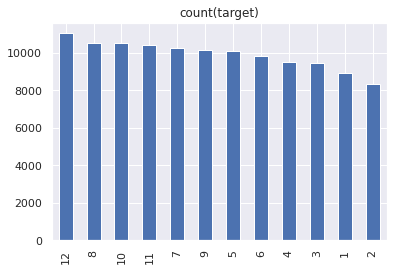

In [ ]:
data["MO"].value_counts().plot(kind='bar',title='count(target)')

## 5. Catagorical Encoding Using Label-Encoding and One-Hot-Encoding

### 1. one hot encoding

In [ ]:
one_hot_encode_data = pd.get_dummies(data, columns = ['MeanTemp'])
print(one_hot_encode_data)

          STA Precip  ...  MeanTemp_39.44444444  MeanTemp_40.0
0       10001  1.016  ...                     0              0
1       10001      0  ...                     0              0
2       10001   2.54  ...                     0              0
3       10001   2.54  ...                     0              0
4       10001      0  ...                     0              0
...       ...    ...  ...                   ...            ...
119035  82506      0  ...                     0              0
119036  82506  9.906  ...                     0              0
119037  82506      0  ...                     0              0
119038  82506      0  ...                     0              0
119039  82506      0  ...                     0              0

[119040 rows x 146 columns]


### 2. label encoding

In [ ]:
data["MeanTemp"].value_counts()

 26.666667    14835
 25.555556    11152
 27.777778    11089
 24.444444     6762
 27.222222     5122
              ...  
-31.666667        1
-33.888889        1
-35.000000        1
-28.333333        1
-29.444444        1
Name: MeanTemp, Length: 136, dtype: int64

In [ ]:
cleanup_nums = {"MeanTemp": {26.666667:1.0, 27.222222:2.0}}
data.replace(cleanup_nums, inplace=True)
data.head()
data.dtypes

STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

In [ ]:
data

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,27,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,12,28,0.39,NaN,NaN,85.0,65.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,12,29,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,30,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,27,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,12,28,0.39,NaN,NaN,85.0,65.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,12,29,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,30,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119035   NaN
119036   NaN
119037   NaN
119038   NaN
119039   NaN
Name: WTE, Length: 119040, dtype: float64

In [ ]:
column_name=list(x.columns)

In [ ]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


## 6. Normalization

### 1. Z-Score

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
std_scalar
# data_std = pd.DataFrame(std_scalar.fit_transform(data), columns = data.columns)
# data_std

StandardScaler(copy=True, with_mean=True, with_std=True)

### 2. Min-Max

In [ ]:
print('Min : ', x.min(axis=0))
print('Max : ', x.max(axis=0))

Min :  STA               10001
Date           1940-1-1
Precip                0
WindGustSpd       18.52
MaxTemp        -33.3333
MinTemp        -38.3333
MeanTemp       -35.5556
YR                   40
MO                    1
DA                    1
DR                    2
SPD                  10
MAX                 -28
MIN                 -37
MEA                 -32
SND                   0
FT                  NaN
FB                  NaN
FTI                 NaN
ITH                 NaN
PGT                   0
SD3                 NaN
RHX                 NaN
RHN                 NaN
RVG                 NaN
dtype: object
Max :  STA               82506
Date           1945-9-9
Precip                T
WindGustSpd      75.932
MaxTemp              50
MinTemp         34.4444
MeanTemp             40
YR                   45
MO                   12
DA                   31
DR                   78
SPD                  41
MAX                 122
MIN                  94
MEA                 104
SND         

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(x)

ValueError: ignored

In [ ]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

NameError: ignored

In [ ]:
data = pd.DataFrame(data=data_scaled, columns= column_name)
data.head()

NameError: ignored

In [ ]:
data.describe()

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000
mean,29659.435795,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,81.003745,64.273808,72.644843
std,20953.209402,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,14.839727,14.453003,14.181324
min,10001.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000
25%,11801.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,78.000000,59.000000,69.000000
50%,22508.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000
75%,33501.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000
max,82506.000000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000


## 7. How to Detect, Handle and Visualize Outliers

### 1. visual data outliers boxplot


di luar dari area biru merupakan nilai outliers

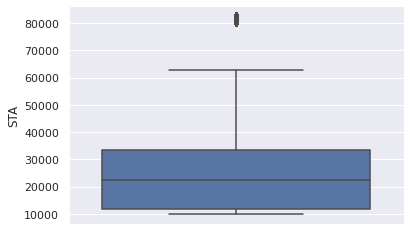

In [ ]:
sns.boxplot(y=data['STA'])

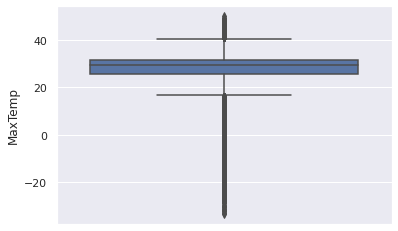

In [ ]:
sns.boxplot(y=data['MaxTemp'])

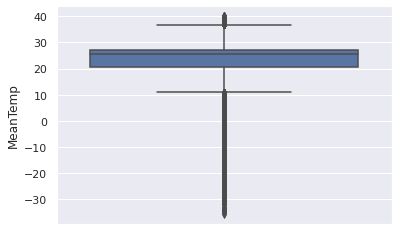

In [ ]:
sns.boxplot(y=data['MeanTemp'])

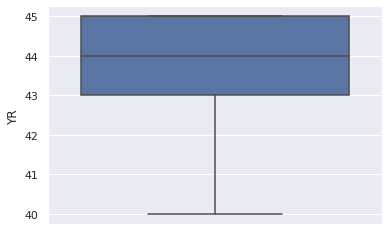

In [ ]:
sns.boxplot(y=data['YR'])

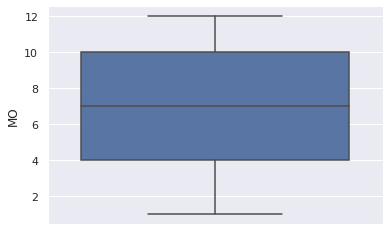

In [ ]:
sns.boxplot(y=data['MO'])

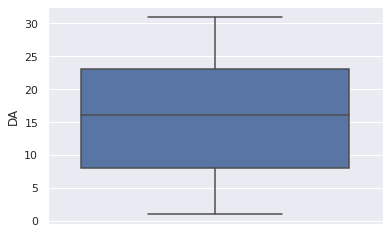

In [ ]:
sns.boxplot(y=data['DA'])

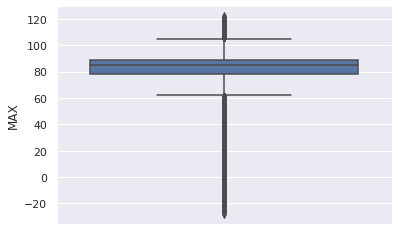

In [ ]:
sns.boxplot(y=data['MAX'])

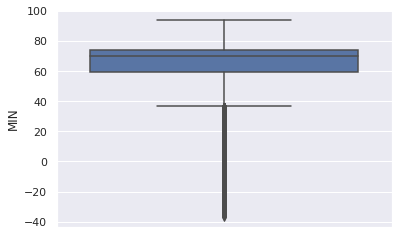

In [ ]:
sns.boxplot(y=data['MIN'])

### 2. menggabungkan x dan y

In [ ]:
data = pd.concat([data,y], axis=1)
data.head()

,STA,Date,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA,MEA
0,10001,1942-7-1,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0,75.0
1,10001,1942-7-2,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0,78.0
2,10001,1942-7-3,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0,76.0
3,10001,1942-7-4,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0,76.0
4,10001,1942-7-5,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0,76.0


### 3. visual data outliers subplots

data outliers pada gambar di bawah merupakan data yang tidak berkerumun (-20,10) sampai (-20,30) dan (20,-20) sampai (40,-20)

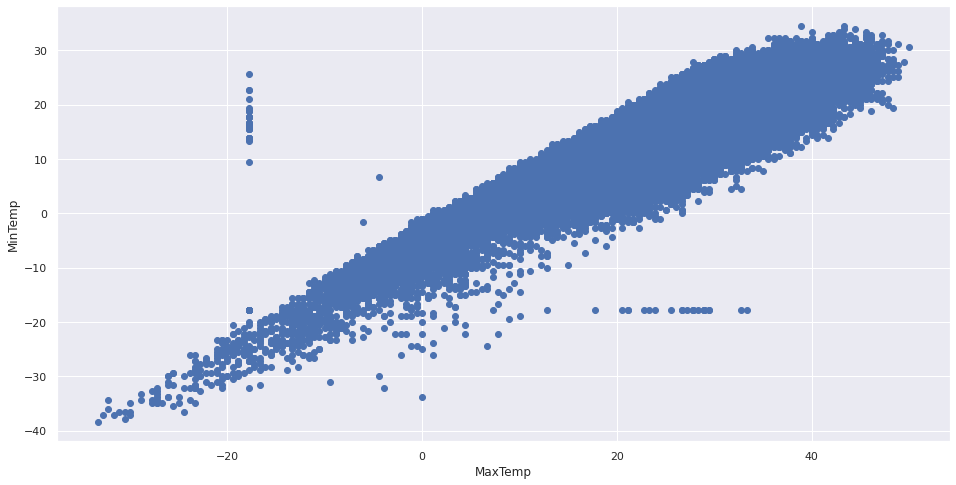

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['MaxTemp'], data['MinTemp'])
ax.set_xlabel('MaxTemp')
ax.set_ylabel('MinTemp')
plt.show()

dara outliers pada gambar di bawah adalah titik-titik di luar dari kerumunan besar

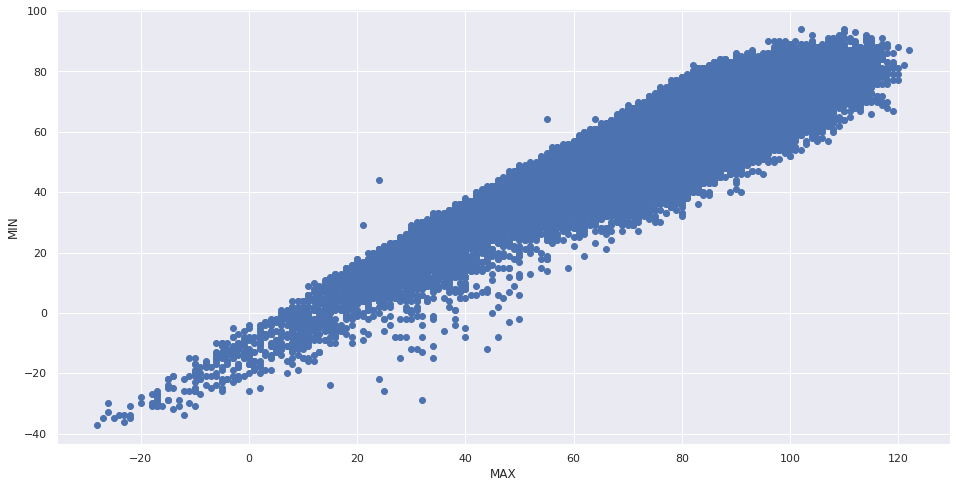

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['MAX'], data['MIN'])
ax.set_xlabel('MAX')
ax.set_ylabel('MIN')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


KeyError: ignored

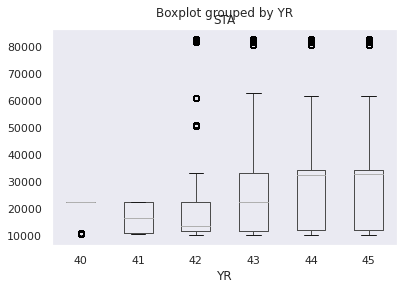

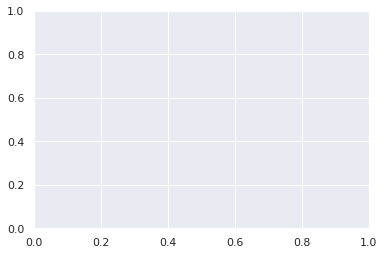

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

X = data.drop("YR",1)
columns_name = list(x.columns)

for i in column_name:
  data.boxplot(by ='YR', column =[i], grid = False)

### 4. Z-score

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)
#it is difficult to say which data point is an outlier

#defining threshold
threshold = 3
print(np.where(z > 3))
print(z)

[[0.93821037 0.17086406 0.53184859 ...        nan        nan 0.16607523]
 [0.93821037 0.21149628 0.46519155 ...        nan        nan 0.37762195]
 [0.93821037 0.10713734 0.53184859 ...        nan        nan 0.2365908 ]
 ...
 [2.52213325 0.14776955 0.06524931 ...        nan        nan 0.09555966]
 [2.52213325 0.14776955 0.06524931 ...        nan        nan 0.09555966]
 [2.52213325 0.275223   0.06806477 ...        nan        nan 0.09555966]]
(array([  6289,   6290,   6291, ..., 113916, 117865, 117865]), array([4, 4, 4, ..., 2, 2, 3]))
[[0.93821037 0.17086406 0.53184859 ...        nan        nan 0.16607523]
 [0.93821037 0.21149628 0.46519155 ...        nan        nan 0.37762195]
 [0.93821037 0.10713734 0.53184859 ...        nan        nan 0.2365908 ]
 ...
 [2.52213325 0.14776955 0.06524931 ...        nan        nan 0.09555966]
 [2.52213325 0.14776955 0.06524931 ...        nan        nan 0.09555966]
 [2.52213325 0.275223   0.06806477 ...        nan        nan 0.09555966]]


In [ ]:
data.shape #actual rows

(119040, 11)

In [ ]:
#Using Z-Score

dataset_cleared_zscore = data[(z < 3).all(axis=1)]
dataset_cleared_zscore
dataset_cleared_zscore.shape #it will remove some rows

(0, 11)

### 5. Quantil data

- atur data set dari kecil ke besar
- kalkulasi quartil 1 dan quartil 3
- cari interquartil range (q1-q3)
- cari lower bound - lower_bound = (q1 -1,5 * iqr)
- cari upper bound - upper_bound = (q1 -1,5 * iqr)

yang berada di atas atau bawah interquartile adalah outliers

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

STA         21700.000000
MaxTemp         6.111111
MinTemp         8.333333
MeanTemp        6.666667
YR              2.000000
MO              6.000000
DA             15.000000
MAX            11.000000
MIN            15.000000
MEA            12.000000
MEA            12.000000
dtype: float64


In [ ]:
data.shape

(119040, 11)

In [ ]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_out.shape)

(93552, 11)


### 6. data out

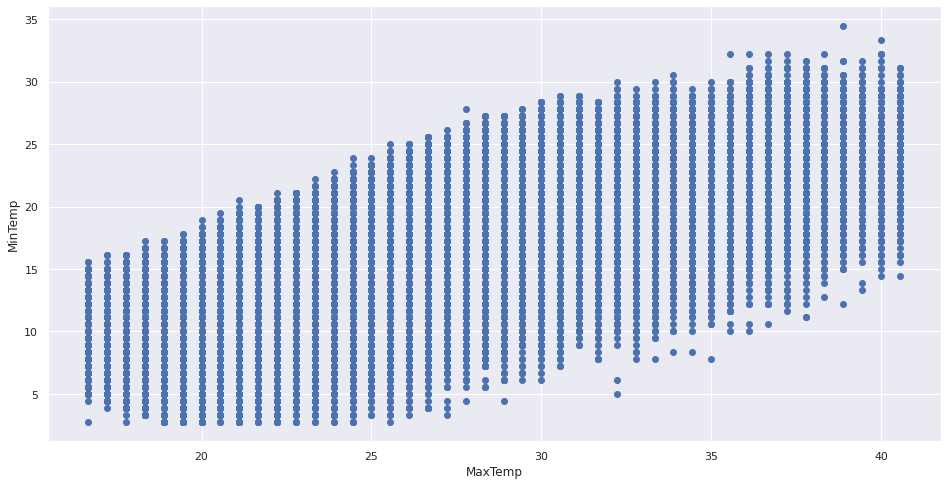

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_out['MaxTemp'], data_out['MinTemp'])
ax.set_xlabel('MaxTemp')
ax.set_ylabel('MinTemp')
plt.show()

In [ ]:
data_out

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA,MEA
0,10001,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0,75.0
1,10001,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0,78.0
2,10001,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0,76.0
3,10001,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0,76.0
4,10001,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
108150,62701,26.111111,15.555556,21.111111,43,6,24,79.0,60.0,70.0,70.0
108151,62701,27.222222,16.111111,21.666667,43,6,25,81.0,61.0,71.0,71.0
108152,62701,26.111111,16.666667,21.111111,43,6,26,79.0,62.0,70.0,70.0
108153,62701,25.000000,18.333333,21.666667,43,6,27,77.0,65.0,71.0,71.0


**data maxTemp yang out**

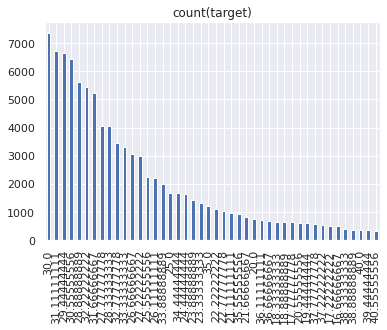

In [ ]:
data_out["MaxTemp"].value_counts().plot(kind='bar',title='count(target)')

In [ ]:
data_out["MaxTemp"].value_counts()

30.000000    7370
31.111111    6719
29.444444    6635
30.555556    6451
28.888889    5614
32.222222    5433
31.666667    5241
27.777778    4060
28.333333    4038
32.777778    3464
33.333333    3293
26.666667    3043
27.222222    2981
25.555556    2247
26.111111    2205
33.888889    1987
25.000000    1664
34.444444    1655
24.444444    1628
23.888889    1432
23.333333    1311
35.000000    1201
22.222222    1089
22.777778    1036
21.111111     942
35.555556     910
21.666667     812
20.000000     744
36.111111     692
36.666667     670
18.333333     654
18.888889     648
17.777778     621
20.555556     620
19.444444     601
37.777778     552
37.222222     542
17.222222     498
16.666667     495
38.333333     385
38.888889     370
40.000000     351
39.444444     348
40.555556     300
Name: MaxTemp, dtype: int64

**data MinTemp yang out**

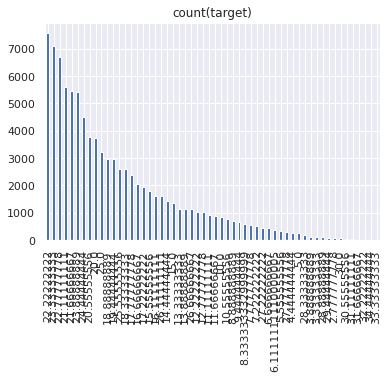

In [ ]:
data_out["MinTemp"].value_counts().plot(kind='bar',title='count(target)')

In [ ]:
data_out["MinTemp"].value_counts()

22.222222    7581
23.333333    7106
22.777778    6698
21.111111    5604
21.666667    5445
23.888889    5436
24.444444    4498
20.555556    3783
20.000000    3721
25.000000    3234
18.888889    2974
19.444444    2962
25.555556    2614
18.333333    2607
17.777778    2377
16.666667    2067
17.222222    1954
15.555556    1783
16.111111    1602
26.111111    1600
14.444444    1422
15.000000    1373
13.333333    1154
13.888889    1146
26.666667    1125
12.222222    1042
12.777778    1032
11.111111     919
11.666667     870
10.000000     854
10.555556     773
8.888889      682
9.444444      652
8.333333      572
7.777778      557
7.222222      512
27.222222     452
6.666667      436
6.111111      364
5.555556      346
27.777778     312
4.444444      248
5.000000      247
28.333333     187
3.888889      123
3.333333      114
28.888889     113
29.444444      86
2.777778       62
30.000000      57
30.555556      31
31.111111      26
31.666667       8
32.222222       7
34.444444       1
33.333333 

**data MeanTemp yang out**

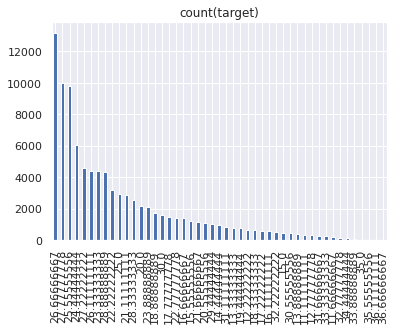

In [ ]:
data_out["MeanTemp"].value_counts().plot(kind='bar',title='count(target)')

In [ ]:
data_out["MeanTemp"].value_counts()

26.666667    13182
27.777778     9977
25.555556     9794
24.444444     6018
27.222222     4566
26.111111     4413
23.333333     4368
28.888889     4344
22.222222     3175
25.000000     2950
21.111111     2830
28.333333     2511
20.000000     2168
23.888889     2068
18.888889     1694
30.000000     1588
17.777778     1488
22.777778     1405
16.666667     1385
15.555556     1223
21.666667     1114
20.555556     1054
29.444444     1038
14.444444      945
31.111111      811
13.333333      784
19.444444      761
12.222222      632
18.333333      611
17.222222      582
16.111111      547
32.222222      494
15.000000      470
30.555556      446
13.888889      359
11.111111      337
12.777778      300
31.666667      270
33.333333      270
11.666667      201
32.777778      142
34.444444      131
33.888889       65
35.000000       21
35.555556       16
36.111111        2
36.666667        2
Name: MeanTemp, dtype: int64

**data YR yang out**

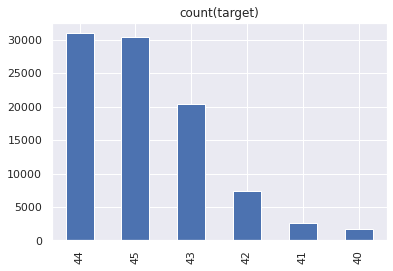

In [ ]:
data_out["YR"].value_counts().plot(kind='bar',title='count(target)')

In [ ]:
data_out["YR"].value_counts()

44    30955
45    30370
43    20355
42     7461
41     2647
40     1764
Name: YR, dtype: int64

**data MO yang out**

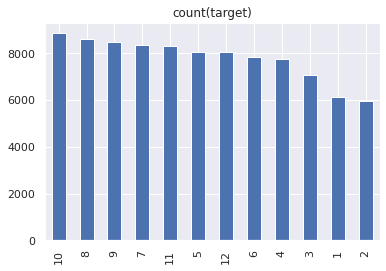

In [ ]:
data_out["MO"].value_counts().plot(kind='bar',title='count(target)')

In [ ]:
data_out["MO"].value_counts()

10    8860
8     8631
9     8483
7     8348
11    8327
5     8076
12    8053
6     7852
4     7751
3     7082
1     6123
2     5966
Name: MO, dtype: int64

**data DA yang out**

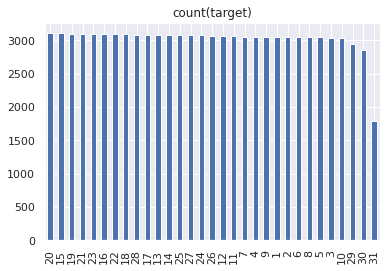

In [ ]:
data_out["DA"].value_counts().plot(kind='bar',title='count(target)')

In [ ]:
data_out["DA"].value_counts()

20    3105
15    3102
19    3098
21    3092
23    3092
16    3090
22    3088
18    3086
28    3085
17    3085
13    3081
14    3080
25    3076
27    3076
24    3074
26    3070
12    3065
11    3062
7     3054
4     3054
9     3052
1     3050
2     3047
6     3046
8     3043
5     3043
3     3040
10    3030
29    2938
30    2852
31    1796
Name: DA, dtype: int64

## 8. Resampling

menyamakan jumlah data dari tiap atribut

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data_out.iloc[:,:-1]
y = data_out.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
data["MaxTemp"].unique()

array([ 25.55555556,  28.88888889,  26.11111111,  26.66666667,
        28.33333333,  27.22222222,  24.44444444,  27.77777778,
        25.        ,  23.88888889,  32.77777778,  30.        ,
        31.11111111,  34.44444444,  30.55555556,  29.44444444,
        31.66666667,  32.22222222,  33.33333333,  33.88888889,
        35.        ,  23.33333333,  21.11111111,  35.55555556,
        36.11111111,  36.66666667,  37.22222222, -17.77777778,
        22.77777778,  22.22222222,  20.        ,  21.66666667,
        20.55555556,  18.33333333,  19.44444444,  18.88888889,
        37.77777778,  38.88888889,  38.33333333,  17.22222222,
        16.66666667,  17.77777778,  16.11111111,  15.        ,
        15.55555556,  40.55555556,  41.66666667,  39.44444444,
        40.        ,  42.22222222,  41.11111111,  42.77777778,
        44.44444444,  46.11111111,  47.22222222,  45.        ,
        46.66666667,  43.88888889,  45.55555556,  43.33333333,
        14.44444444,  13.33333333,  11.11111111,  12.77

In [ ]:
data["MinTemp"].unique()

array([ 22.22222222,  21.66666667,  22.77777778,  21.11111111,
        20.        ,  20.55555556,  18.88888889,  19.44444444,
        17.77777778,  23.33333333,  23.88888889,  17.22222222,
        16.11111111,  16.66666667,  18.33333333,  24.44444444,
        25.        ,  25.55555556,  26.66666667,  26.11111111,
        27.77777778,  27.22222222,  28.33333333,  15.        ,
       -17.77777778,  13.33333333,  15.55555556,  13.88888889,
        14.44444444,  12.77777778,  12.22222222,  11.66666667,
        10.55555556,  11.11111111,  28.88888889,  10.        ,
         8.88888889,   8.33333333,   9.44444444,   7.77777778,
         5.        ,   6.66666667,   5.55555556,   6.11111111,
         7.22222222,  30.55555556,  31.11111111,  30.        ,
        32.77777778,   3.33333333,   4.44444444,   2.22222222,
         1.66666667,   2.77777778,   3.88888889,   1.11111111,
         0.55555556,   0.        ,  29.44444444,  32.22222222,
        -1.11111111,  -1.66666667,  31.66666667,  33.88

In [ ]:
data["MeanTemp"].unique()

array([ 23.88888889,  25.55555556,  24.44444444,  25.        ,
        23.33333333,  22.77777778,  22.22222222,  21.66666667,
        26.11111111,  28.33333333,  26.66666667,  27.22222222,
        27.77777778,  28.88888889,  29.44444444,  20.55555556,
        30.        ,  30.55555556,  21.11111111, -17.77777778,
        31.11111111,  31.66666667,  20.        ,  19.44444444,
        18.88888889,  18.33333333,  17.77777778,  17.22222222,
        16.66666667,  15.55555556,  32.22222222,  13.88888889,
        14.44444444,  16.11111111,  15.        ,  13.33333333,
        12.22222222,  11.11111111,  10.55555556,  11.66666667,
        12.77777778,  33.33333333,  35.55555556,  32.77777778,
        34.44444444,  33.88888889,  36.66666667,  36.11111111,
        38.88888889,  37.77777778,  35.        ,  38.33333333,
         9.44444444,   8.88888889,  10.        ,   8.33333333,
        37.22222222,   7.22222222,   7.77777778,   6.66666667,
         4.44444444,   5.55555556,   6.11111111,   3.88

In [ ]:
data["YR"].unique()

array([42, 43, 44, 45, 41, 40])

In [ ]:
data["MO"].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [ ]:
data["DA"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

Confusion matrix:
 [[ 67   0   0 ...   0   0   0]
 [  0  40   0 ...   0   0   0]
 [  0   0 126 ...   0   0   0]
 ...
 [  0   0   0 ...  26   0   0]
 [  0   0   0 ...   0   4   0]
 [  0   0   0 ...   0   0   3]]


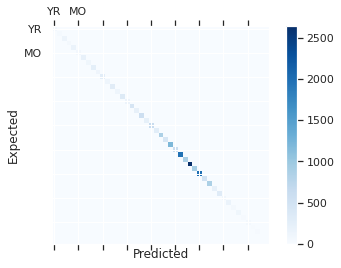

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['YR', 'MO']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
menduplikasi agar mudah mengenali data

In [ ]:
print(Counter(y))

Counter({80.0: 13182, 82.0: 9977, 78.0: 9794, 76.0: 6018, 81.0: 4566, 79.0: 4413, 74.0: 4368, 84.0: 4344, 72.0: 3175, 77.0: 2950, 70.0: 2830, 83.0: 2511, 68.0: 2168, 75.0: 2068, 66.0: 1694, 86.0: 1588, 64.0: 1488, 73.0: 1405, 62.0: 1385, 60.0: 1223, 71.0: 1114, 69.0: 1054, 85.0: 1038, 58.0: 945, 88.0: 811, 56.0: 784, 67.0: 761, 54.0: 632, 65.0: 611, 63.0: 582, 61.0: 547, 90.0: 494, 59.0: 470, 87.0: 446, 57.0: 359, 52.0: 337, 55.0: 300, 89.0: 270, 92.0: 270, 53.0: 201, 91.0: 142, 94.0: 131, 93.0: 65, 95.0: 21, 96.0: 16, 98.0: 2, 97.0: 2})


In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### 1. RANDOM OVER SAMPLING

Random oversampling, atau oversampling secara acak adalah teknik oversampling di mana anggota dari kelas minoritas dipilih secara acak dan diduplikasi ke dataset yang baru hingga tercapai keseimbangan (Liu, 2004). Data minoritas tersebut dapat diduplikasi beberapa kali. Teknik ini biasanya menyebabkan overfitting pada model(Amin, et al., 2016; Liu, 2004)

In [ ]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution
print(Counter(y_ros))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({75.0: 13182, 78.0: 13182, 76.0: 13182, 77.0: 13182, 74.0: 13182, 73.0: 13182, 72.0: 13182, 71.0: 13182, 79.0: 13182, 83.0: 13182, 80.0: 13182, 81.0: 13182, 82.0: 13182, 84.0: 13182, 85.0: 13182, 69.0: 13182, 86.0: 13182, 87.0: 13182, 70.0: 13182, 88.0: 13182, 89.0: 13182, 68.0: 13182, 67.0: 13182, 66.0: 13182, 65.0: 13182, 64.0: 13182, 63.0: 13182, 62.0: 13182, 60.0: 13182, 90.0: 13182, 57.0: 13182, 58.0: 13182, 61.0: 13182, 59.0: 13182, 56.0: 13182, 54.0: 13182, 52.0: 13182, 55.0: 13182, 91.0: 13182, 94.0: 13182, 92.0: 13182, 96.0: 13182, 93.0: 13182, 53.0: 13182, 95.0: 13182, 98.0: 13182, 97.0: 13182})


### 2. SMOTE

SMOTE atau Synthetic Minority Oversampling Technique adalah teknik oversampling terpopuler yang diproposalkan oleh Chawla (Chawla, Bowyer, Hall, & Kegelmeyer, 2002) pada tahun 2002. Teknik ini membuat data tiruan atau sintetik berdasarkan tetangga-tetangga terdekat dari sampel kelas minoritas.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
x_sm, y_sm = smote.fit_sample(x, y)

print(Counter(y_sm))

### 3. Random Under Sampling


Random undersampling, atau undersampling secara acak adalah teknik undersampling di mana anggota dari kelas mayoritas dipilih secara acak dan dihapus dari dataset training hingga tercapai keseimbangan. Kekurangan dari teknik ini adalah tidak ada cara untuk mengatur informasi apa saja yang dihilangkan dari dataset tersebut, informasi yang berguna bisa saja hilang (Amin, et al., 2016; Liu, 2004; Yen & Lee, 2006; More, 2016)

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

### 4. Tomek Links

Tomek Link atau tautan Tomek adalah metode undersampling yang diproposalkan oleh Tomek (Tomek, 1976) untuk memodifikasi CNN (Condensed Nearest Neighbor). Teknik ini menghapus sampel kelas mayoritas jika dan hanya jika tetangga kelas mayoritas tersebut berasal dari kelas berbeda dan merupakan tetangga terdekat satu sama lain.

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print(Counter(y_tl)

### 5. Cluster Centroid

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

print(Counter(y_cc))

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = X_sm
y = y_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Confusion matrix:
 [[ 67   0   0 ...   0   0   0]
 [  0  40   0 ...   0   0   0]
 [  0   0 126 ...   0   0   0]
 ...
 [  0   0   0 ...  26   0   0]
 [  0   0   0 ...   0   4   0]
 [  0   0   0 ...   0   0   3]]


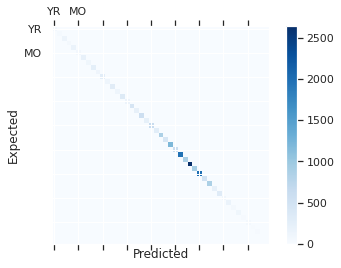

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['YR', 'MO']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()